
![Banner del Proyecto](https://www.sunwaretechnologies.com/Images/Solution%20Engineering%20and%20Development/Sunware_Services_Strategy_Sunware_Services_Strategy_Data_Analytics_Banner.png)

----


## Información del Proyecto

- **Alumno:** Hernán Guido Gustavo Casasola  
- **Materia:** Análisis y Visualización de Datos con Python  
- **Carrera:** Tecnicatura Universitaria en Desarrollo de Software  
- **Año:** 2024  
- **Institución:** Universidad Provincial de Administración, Tecnología y Oficios (UPATecO)  
- **Docencia y Contenido Académico:** Academia CIMNE-IBER

---


#Abstract del Dataset

Este conjunto de datos proporciona una visión detallada de las canciones más populares de Spotify entre 2010 y 2023. Contiene información clave como:

- **Artistas**: Los intérpretes de las canciones.
- **Reproducciones Totales y Diarias**: Indicadores del éxito y la consistencia.
- **Géneros Musicales**: Clasificación principal y subgéneros.
- **Año de Popularidad**: El año en que las canciones alcanzaron su mayor relevancia.

El dataset fue compilado a partir de las listas principales de **Kworb Spotify** y enriquecido con datos de géneros obtenidos de la API de Spotify. Esto permite analizar tendencias musicales, identificar patrones de popularidad y explorar la evolución de los géneros musicales a lo largo de 14 años.

- **Fuente:** [Top Streamed Spotify Songs by Year (2010-2023) - Kaggle](https://www.kaggle.com/datasets/irynatokarchuk/top-streamed-spotify-songs-by-year-2010-2023/data)

El archivo fue descargado y posteriormente subido a un repositorio de GitHub para facilitar su análisis.


#Tablas de Variables


| Columna          | Descripción                                         | Relevancia                              |
|-------------------|-----------------------------------------------------|-----------------------------------------|
| Unnamed: 0       | Índice, no parece relevante.                        | Renombrada para ser usada como índice.  |
| Artist and Title | Canción y artista, útil para identificar registros. | Alta, identifica canciones únicas.     |
| Artist           | Nombre del artista, ayuda en análisis de popularidad. | Alta, para estudiar popularidad.       |
| Streams          | Número total de streams, mide el éxito de la canción. | Clave para el análisis los éxito.      |
| Daily            | Streams diarios, mide la consistencia.              | Útil para medir tendencias diarias.    |
| Year             | Año de lanzamiento, identifica tendencias temporales. | Relevante para análisis por años.      |
| Main_Genre       | Género principal, esencial para categorización.     | Clave para análisis por género.        |
| Genres           | Lista de géneros asociados.                         | Contexto adicional.                    |
| First_Genre      | Subgénero principal.                                | Útil para análisis detallados.         |
| Second_Genre     | Subgénero secundario.                               | Menor relevancia pero aporta detalles. |
| Third_Genre      | Subgénero terciario.                                | Menor relevancia pero aporta detalles. |



<h1 style="text-align: center;">Exploración y Análisis de Datos (EDA)</h1>


### Instalación de Bibliotecas

En esta notebook, utilizamos Google Colab, que ya incluye muchas de las bibliotecas necesarias para análisis de datos, como `pandas`, `numpy` y `matplotlib`. Por lo tanto, no es necesario instalarlas manualmente. Sin embargo, si se ejecuta este código en otro entorno, es posible que debas instalar algunas bibliotecas adicionales.


In [ ]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Cargar el archivo CSV desde GitHub (raw URL)
url = "https://raw.githubusercontent.com/GuidoMaxier/Analisis_Datos_Pyhon/refs/heads/main/DataSet/spotify_full_list_20102023.csv"
df = pd.read_csv(url, index_col=0)

#Inspección del dataset

Cantidad de filas y columnas

In [62]:
print(f' Filas y Columnas del archivo Original: {df.shape}')

 Filas y Columnas del archivo Original: (10441, 10)


In [63]:
# Inspeccionar las primeras filas
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
                            Artist and Title       Artist     Streams   Daily  \
Unnamed: 0                                                                      
0                   J. Cole - No Role Modelz      J. Cole  2300753974  987553   
1                   Sam Smith - Stay With Me    Sam Smith  2135129240  875392   
2                  Mark Ronson - Uptown Funk  Mark Ronson  2039781091  675268   
3           Sam Smith - I'm Not The Only One    Sam Smith  1926711475  791299   
4                           Maroon 5 - Sugar     Maroon 5  1877824112  552959   

              year   main_genre  \
Unnamed: 0                        
0           2014.0  Hip-Hop/Rap   
1           2014.0          Pop   
2           2014.0          Pop   
3           2014.0          Pop   
4           2014.0          Pop   

                                                       genres  \
Unnamed: 0                                                      
0           ['conscious hip 

In [64]:
# Información general del dataset
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 10441 entries, 0 to 21615
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist and Title  10441 non-null  object 
 1   Artist            10441 non-null  object 
 2   Streams           10441 non-null  int64  
 3   Daily             10441 non-null  int64  
 4   year              10441 non-null  float64
 5   main_genre        10110 non-null  object 
 6   genres            10110 non-null  object 
 7   first_genre       10110 non-null  object 
 8   second_genre      10110 non-null  object 
 9   third_genre       10110 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 897.3+ KB
None


In [65]:
# Mostrar las últimas 3 filas
print(df.tail(3))

                                  Artist and Title           Artist  \
Unnamed: 0                                                            
21613                           Sigrid - Strangers           Sigrid   
21614       GAMPER & DADONI - Gimme! Gimme! Gimme!  GAMPER & DADONI   
21615                    Armaan Malik - Chale Aana     Armaan Malik   

              Streams   Daily    year         main_genre  \
Unnamed: 0                                                 
21613       137925577   15840  2019.0                Pop   
21614       137471196   60612  2019.0   Electronic/Dance   
21615       137191356  202476  2019.0  World/Traditional   

                                                     genres   first_genre  \
Unnamed: 0                                                                  
21613                       ['electropop', 'norwegian pop']    electropop   
21614       ['german dance', 'pop dance', 'tropical house']  german dance   
21615                         ['fil

#### Descripión variables

In [66]:
# Descripción variable
print("\nDescripción estadística:")
print(df.describe())


Descripción estadística:
            Streams         Daily          year
count  1.044100e+04  1.044100e+04  10441.000000
mean   3.388738e+08  1.557488e+05   2017.671487
std    3.540370e+08  2.177395e+05      3.536200
min    1.000835e+08  0.000000e+00   2010.000000
25%    1.500282e+08  4.116200e+04   2015.000000
50%    2.107983e+08  8.247300e+04   2018.000000
75%    3.677910e+08  1.746950e+05   2021.000000
max    4.387732e+09  3.009384e+06   2023.000000


#### Duplicadas

In [67]:
# Duplicados
if df.duplicated().sum() > 0:
  print(df.loc[df.duplicated(), :])
  rta = input("Desea eliminar duplicados: (s/n)").lower()
  if rta == "s":
    df.drop_duplicates(inplace=True)
    print("Duplicados eliminados")
    print(df.loc[df.duplicated(), :])
  else:
    print("No se eliminaron duplicados")

###Renombrar variables


In [71]:
#Renombrar varible
df.rename(columns={
    "Unnamed: 0": "Index",
    "Artist and Title": "Artist_Title",
    "year": "Year",
    "main_genre": "Main_Genre",
    "first_genre": "First_Genre",
    "second_genre": "Second_Genre",
    "third_genre": "Third_Genre"
}, inplace=True)

print(df.columns)

Index(['Artist_Title', 'Artist', 'Streams', 'Daily', 'Year', 'Main_Genre',
       'genres', 'First_Genre', 'Second_Genre', 'Third_Genre'],
      dtype='object')


###Buscar valores nulos:

In [70]:
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Artist_Title      0
Artist            0
Streams           0
Daily             0
Year              0
Main_Genre      331
genres          331
First_Genre     331
Second_Genre    331
Third_Genre     331
dtype: int64


###Convertir a valores

In [43]:
# Convertir 'Year' y 'Streams' a tipos numéricos
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Streams'] = pd.to_numeric(df['Streams'], errors='coerce')


##Distribución de canciones por año

<ipython-input-29-ae93c8f0a501>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Year", palette="viridis")


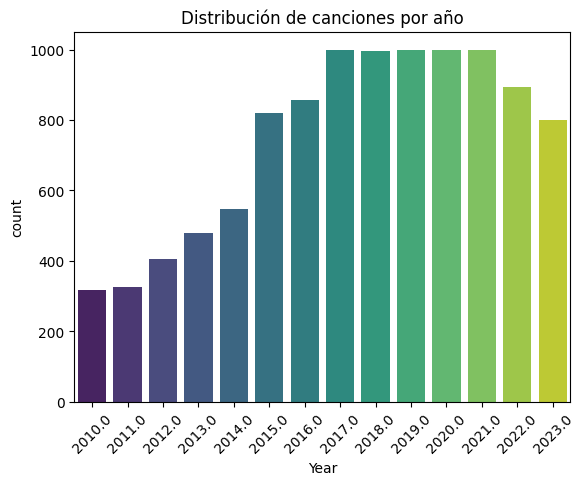

In [29]:
sns.countplot(data=df, x="Year", palette="viridis")
plt.title("Distribución de canciones por año")
plt.xticks(rotation=45)
plt.show()


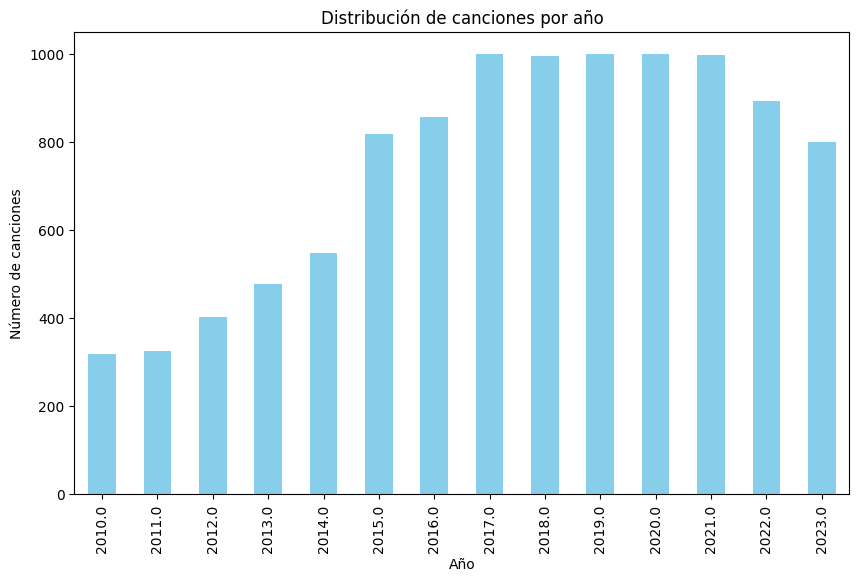

In [30]:
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribución de canciones por año')
plt.xlabel('Año')
plt.ylabel('Número de canciones')
plt.show()


##Canciones más populares (Streams)


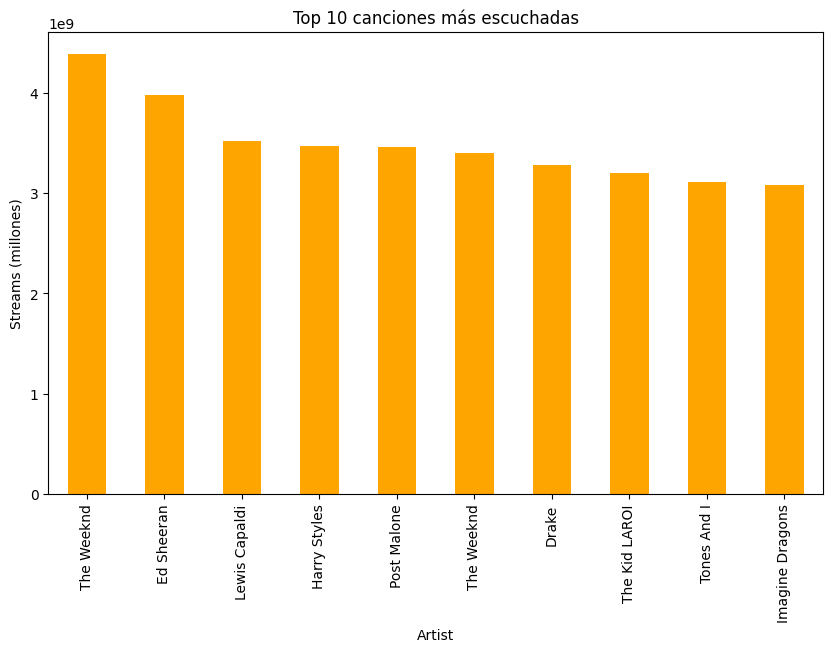

In [ ]:
top_songs = df.nlargest(10, 'Streams')[['Artist', 'Streams']]
top_songs.plot(x='Artist', y='Streams', kind='bar', color='orange', legend=False, figsize=(10, 6))
plt.title('Top 10 canciones más escuchadas')
plt.ylabel('Streams (millones)')
plt.show()


##Distribución por género musical:

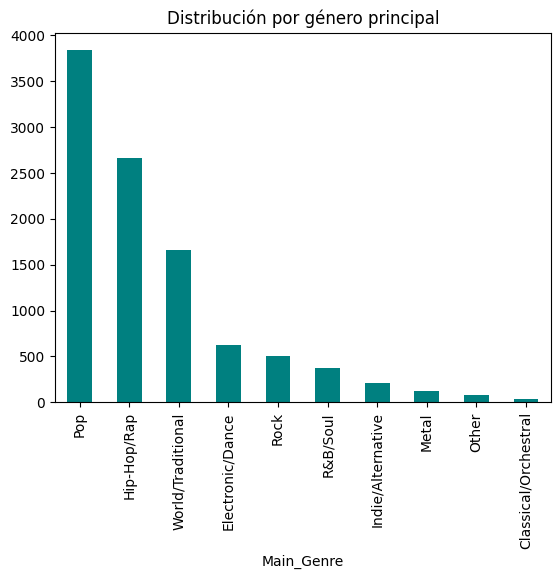

In [ ]:
df['Main_Genre'].value_counts().plot(kind="bar", color="teal")
plt.title("Distribución por género principal")
plt.show()


##Correlación entre variables numéricas:

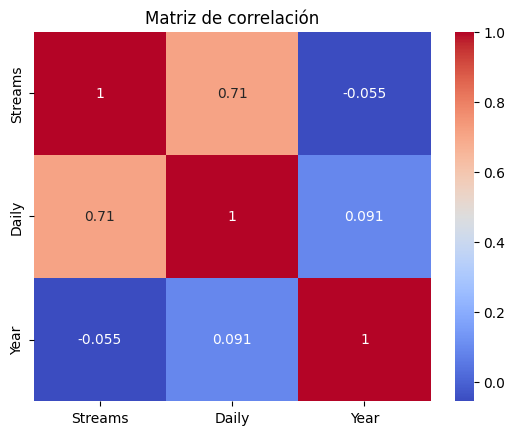

In [85]:
"""Correlación entre variables"""
corr = df[['Streams', 'Daily', 'Year']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


In [72]:
# Identificar valores únicos en Year y Main Genre
print(df['Year'].unique())
print(df['Main_Genre'].unique())

[2014. 2017. 2010. 2012. 2013. 2011. 2021. 2022. 2023. 2016. 2015. 2020.
 2018. 2019.]
['Hip-Hop/Rap' 'Pop' 'Rock' 'R&B/Soul' 'Indie/Alternative'
 'Electronic/Dance' 'World/Traditional' 'Metal' nan 'Classical/Orchestral'
 'Other']


##Tendencias de streams por año

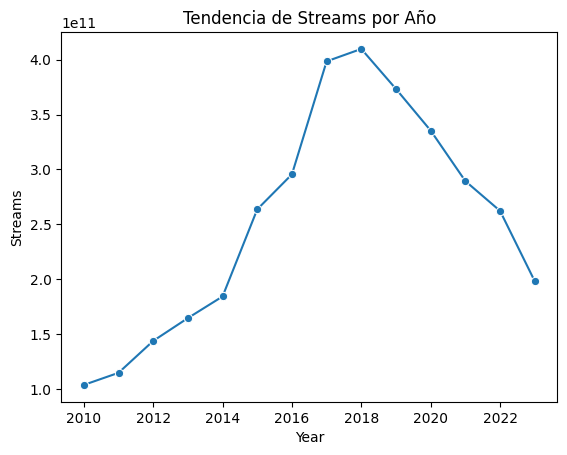

In [38]:
# Agrupar por año
year_data = df.groupby('Year', as_index=False)['Streams'].sum()

# Gráfico de línea
sns.lineplot(data=year_data, x='Year', y='Streams', marker='o')
plt.title('Tendencia de Streams por Año')
plt.show()


##Distribución de géneros en el tiempo

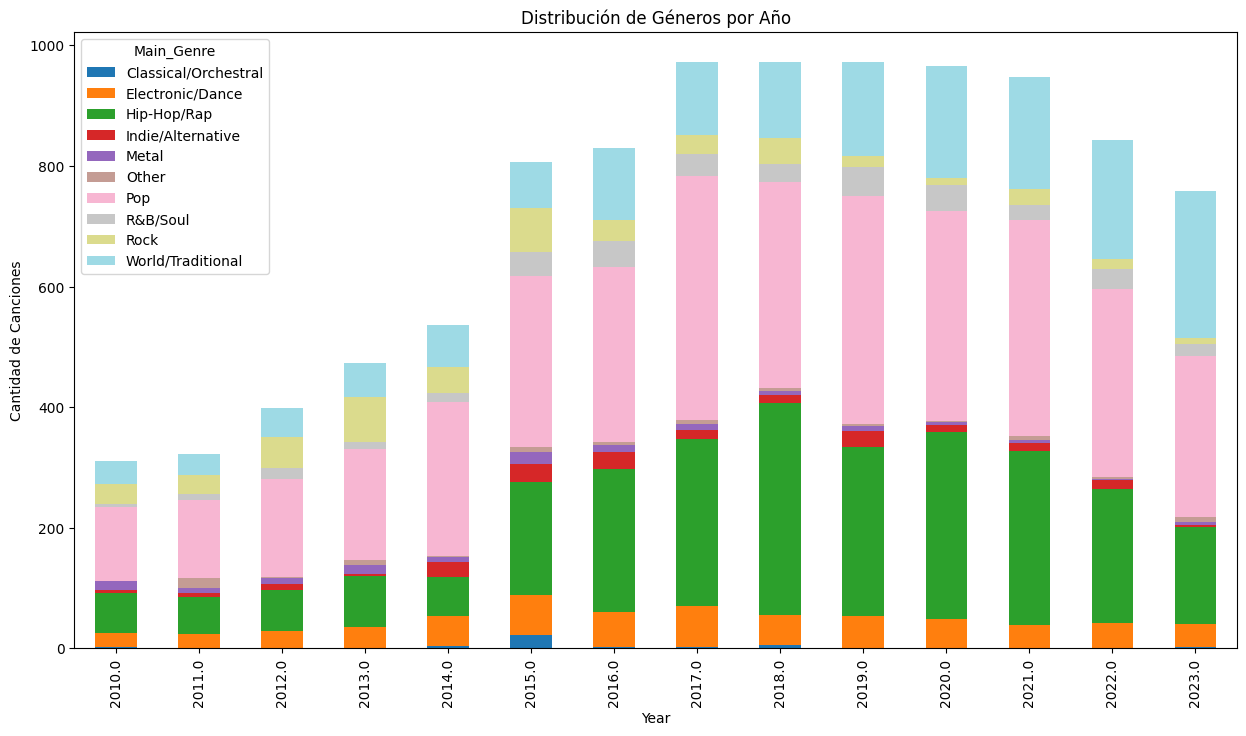

In [40]:
# Gráfico de barras apiladas
genre_year = df.groupby(['Year', 'Main_Genre']).size().unstack(fill_value=0)
genre_year.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.title('Distribución de Géneros por Año')
plt.ylabel('Cantidad de Canciones')
plt.show()


#Preguntas a responder


###¿Qué géneros han dominado la música popular en Spotify?



In [73]:
genre_streams = df.groupby('Main_Genre')['Streams'].sum().sort_values(ascending=False)
print(genre_streams)


Main_Genre
Pop                     1504854315141
Hip-Hop/Rap              877276031089
World/Traditional        432503750207
Electronic/Dance         206872596151
Rock                     174906689358
R&B/Soul                 136421076804
Indie/Alternative         68587093704
Metal                     26617227425
Other                     21167504023
Classical/Orchestral       8328792738
Name: Streams, dtype: int64


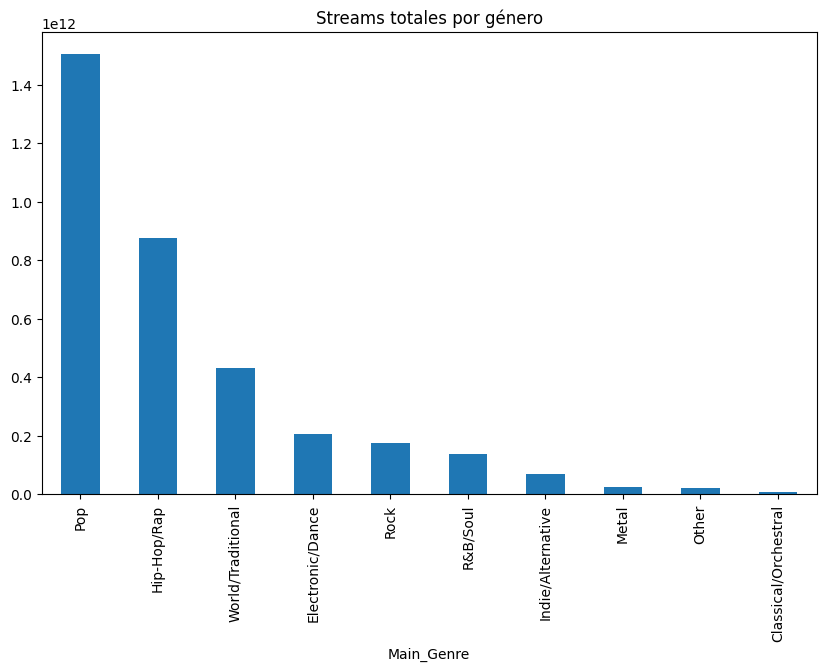

In [74]:
genre_streams.plot(kind='bar', figsize=(10, 6), title="Streams totales por género")
plt.show()


###¿Cómo ha cambiado la popularidad de ciertos géneros con el tiempo?

In [75]:
genre_yearly = df.groupby(['Year', 'Main_Genre'])['Streams'].sum().reset_index()


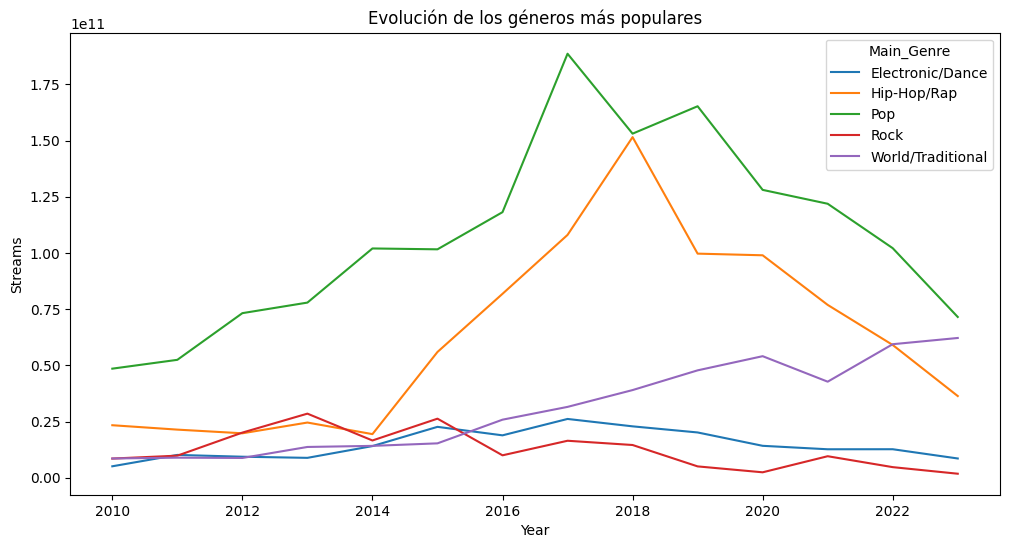

In [77]:
import seaborn as sns

# Filtrar los géneros más populares (los 5 principales)
top_genres = genre_streams.head(5).index
genre_yearly_filtered = genre_yearly[genre_yearly['Main_Genre'].isin(top_genres)]

# Gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_yearly_filtered, x='Year', y='Streams', hue='Main_Genre')
plt.title("Evolución de los géneros más populares")
plt.show()


###¿Qué relación existe entre los streams diarios y los totales por género?

In [78]:
genre_stats = df.groupby('Main_Genre').agg({
    'Streams': 'mean',
    'Daily': 'mean'
}).reset_index()
print(genre_stats)


             Main_Genre       Streams          Daily
0  Classical/Orchestral  2.031413e+08   74332.902439
1      Electronic/Dance  3.320587e+08  135695.698234
2           Hip-Hop/Rap  3.295552e+08  132439.785124
3     Indie/Alternative  3.329471e+08  253049.262136
4                 Metal  2.129378e+08  103851.096000
5                 Other  2.581403e+08  113566.768293
6                   Pop  3.922978e+08  169382.919187
7              R&B/Soul  3.628220e+08  192762.130319
8                  Rock  3.491151e+08  163209.051896
9     World/Traditional  2.608587e+08  159249.201448


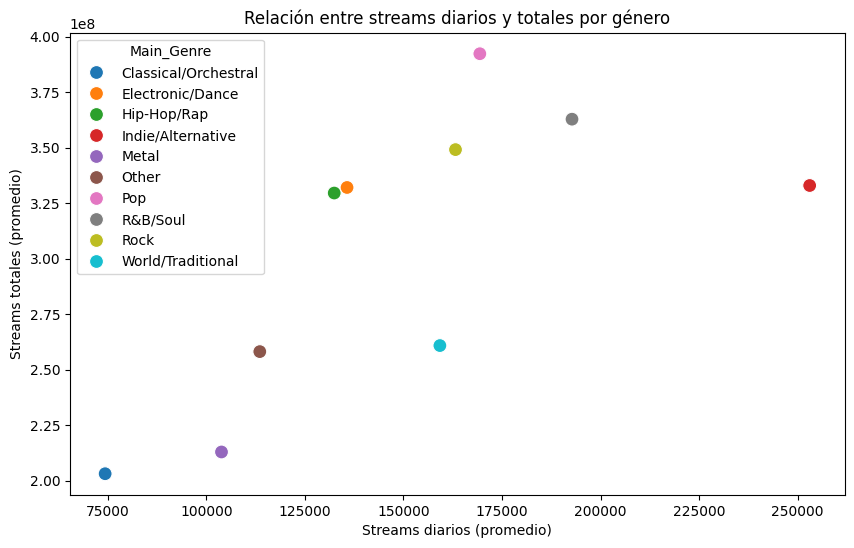

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=genre_stats, x='Daily', y='Streams', hue='Main_Genre', s=100)
plt.title("Relación entre streams diarios y totales por género")
plt.xlabel("Streams diarios (promedio)")
plt.ylabel("Streams totales (promedio)")
plt.show()


###¿Qué año tiene el mayor número de canciones populares?

In [80]:
songs_per_year = df.groupby('Year').size().sort_values(ascending=False)
print(songs_per_year)


Year
2017.0    1000
2019.0    1000
2020.0    1000
2021.0     999
2018.0     997
2022.0     893
2016.0     857
2015.0     820
2023.0     801
2014.0     548
2013.0     479
2012.0     404
2011.0     325
2010.0     318
dtype: int64


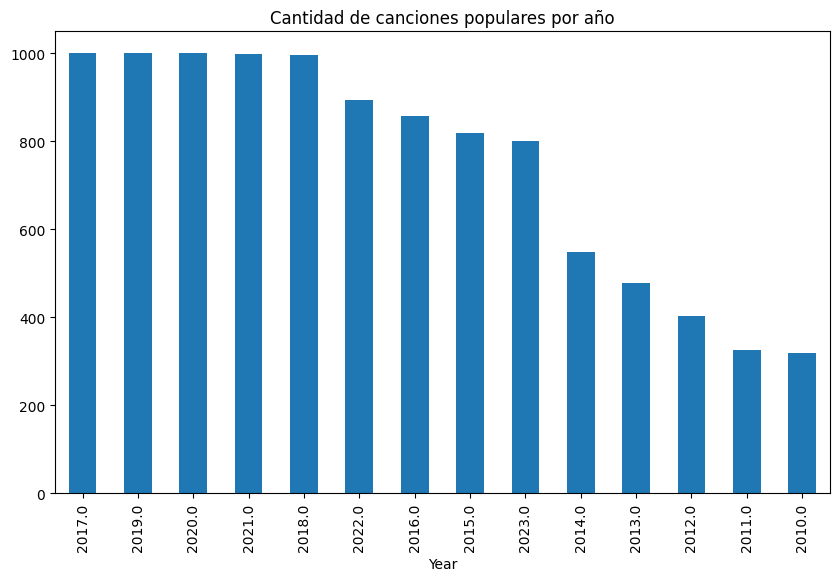

In [81]:
songs_per_year.plot(kind='bar', figsize=(10, 6), title="Cantidad de canciones populares por año")
plt.show()
